[[20 30 50]
 [25 30 45]
 [30 25 45]
 [35 20 45]
 [40 20 40]]


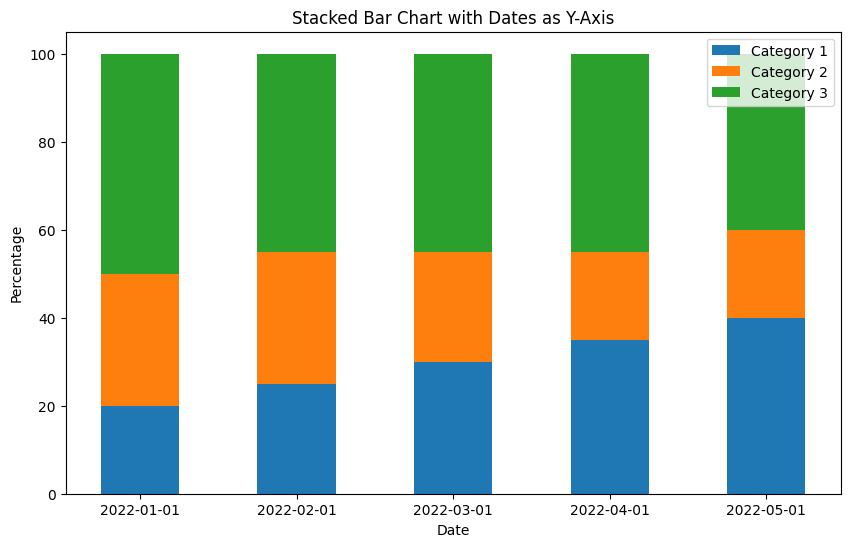

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
dates = ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01']
data = np.array([[20, 30, 50], [25, 30, 45], [
                30, 25, 45], [35, 20, 45], [40, 20, 40]])

# Convert data to percentages
data_percent = data
print(data_percent)
# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(dates, data_percent[:, 0], label='Category 1', width=0.5)
plt.bar(dates, data_percent[:, 1],
        bottom=data_percent[:, 0], label='Category 2', width=0.5)
plt.bar(dates, data_percent[:, 2], bottom=data_percent[:,
        0]+data_percent[:, 1], label='Category 3', width=0.5)

# Add axis labels and legend
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart with Dates as Y-Axis')
plt.legend()

plt.show()


In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv('../data/cleaned.csv')

# Create a new column indicating the number of unique letters in each solution word
df["unique_letters"] = df["word"].apply(
    lambda x: len(set(x)))

# Convert the classification of the word into numerical values
df["difficulty"] = pd.factorize(df["difficulty"])[0]

# Split the data into training and testing sets
X = df[["unique_letters"]]
y = df["difficulty"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance of the model
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification report:")
print(classification_report(y_test, y_pred))

# Use the model to classify the word "EERIE"
word = "EERIE"
unique_letters = len(set(word))
difficulty = clf.predict([[unique_letters]])[0]

# Print the predicted difficulty of the word "EERIE"
print(f"The predicted difficulty of the word '{word}' is {difficulty}.")


KeyError: 'difficulty'